In [12]:
# Data Set for Heart Disease

In [13]:
library(tidyverse)
library(repr)
library(rvest)
library(tidymodels)
options(repr.matrix.max.rows = 6)


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




In [14]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_data <- as_tibble(read.table(url, sep = ",", header = FALSE, na.strings = "?"))

# display the data
heart_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
38,1,3,138,175,0,0,173,0,0.0,1,NA,3,0


In [15]:
# add column names
colnames(heart_data) <- c("age", "sex", "chest_pain_type", "resting_bp", "cholesterol", "fasting_blood_sugar", "resting_electro_results", "max_heart_rate", "exercise_induced_ang", "depression_induced", "peak_exercise", "number_vessels", "normality", "diagnosis")

# clean the data
heart_data_clean <- heart_data |>
    select(age, chest_pain_type, cholesterol)

heart_data_clean

age,chest_pain_type,cholesterol
<dbl>,<dbl>,<dbl>
63,1,233
67,4,286
67,4,229
⋮,⋮,⋮
57,4,131
57,2,236
38,3,175


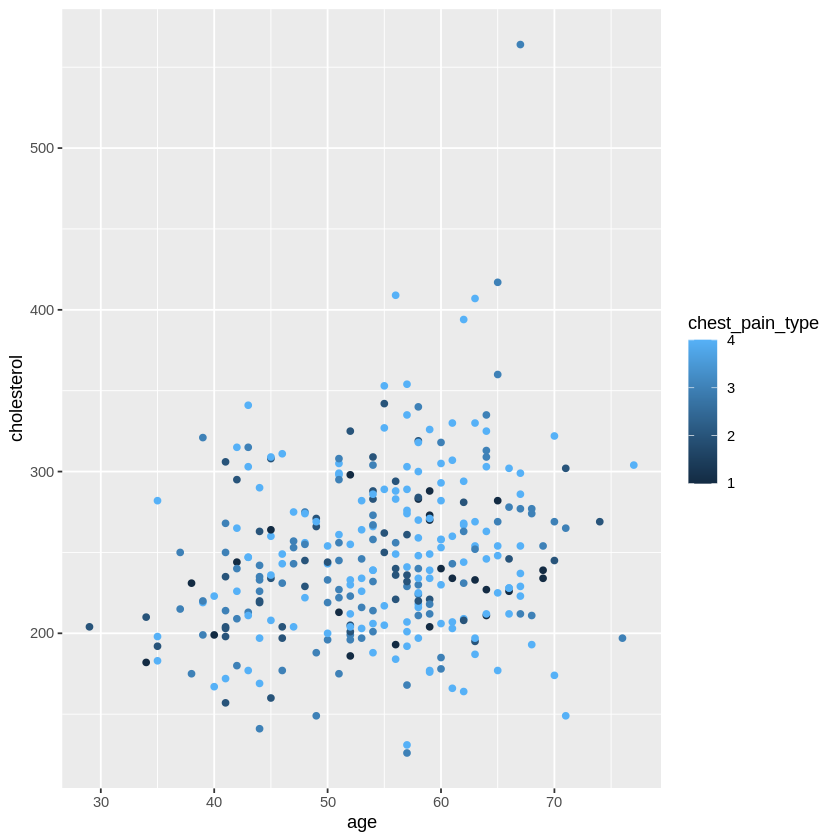

In [16]:
heart_data_plot <- heart_data |>
    ggplot(aes(x = age, y = cholesterol, color = chest_pain_type)) +
    geom_point()

heart_data_plot